# Data Visualisation for Fraud Dataset
This notebook serves to show analytics and visualisations for `Base.csv`, `test.csv`, `normal.csv` and other relevant data files to aid the reader discover how the team came about certain details and strategies for training and validating the model to improve accuracy.


### Import Datasets

We start by importing all the relevant datasets for analytics.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# - load the datasets
base_df = pd.read_csv("./data/raw/Base.csv")
test_df = pd.read_csv("./data/splits/test/test.csv")
normal_df = pd.read_csv("./data/splits/train/normal.csv")
fraud_df = pd.read_csv("./data/splits/train/fraud.csv")

# - data frames
display(base_df.head())
print("Base shape:", base_df.shape)
print("Test shape:", test_df.shape)
print("Normal shape:", normal_df.shape)
print("Fraud shape:", fraud_df.shape)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


Base shape: (1000000, 32)
Test shape: (250000, 32)
Normal shape: (494485, 31)
Fraud shape: (5515, 31)


### Plot the distribution

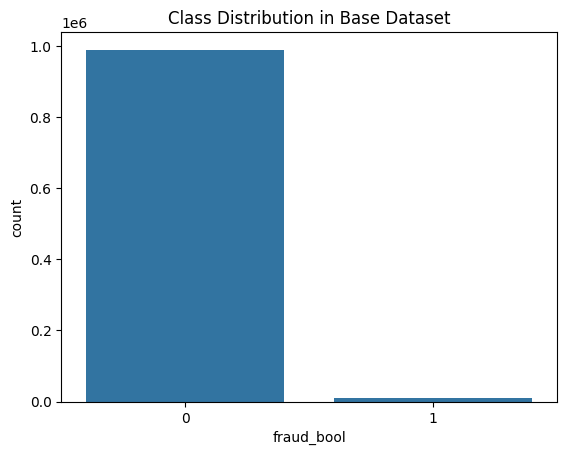

In [5]:
if 'fraud_bool' in base_df.columns:
    sns.countplot(data=base_df, x='fraud_bool')
    plt.title("Class Distribution in Base Dataset")
    plt.show()


### Correlation Heatmap

This shows the correlation score between different feature pairs. The "red-der" the block, the higher the correlation between the two features. Ignoring the trivial diagonal line (since a feature is highly correlated with itself), we can observe some strong correlations which can help with preprocessing.

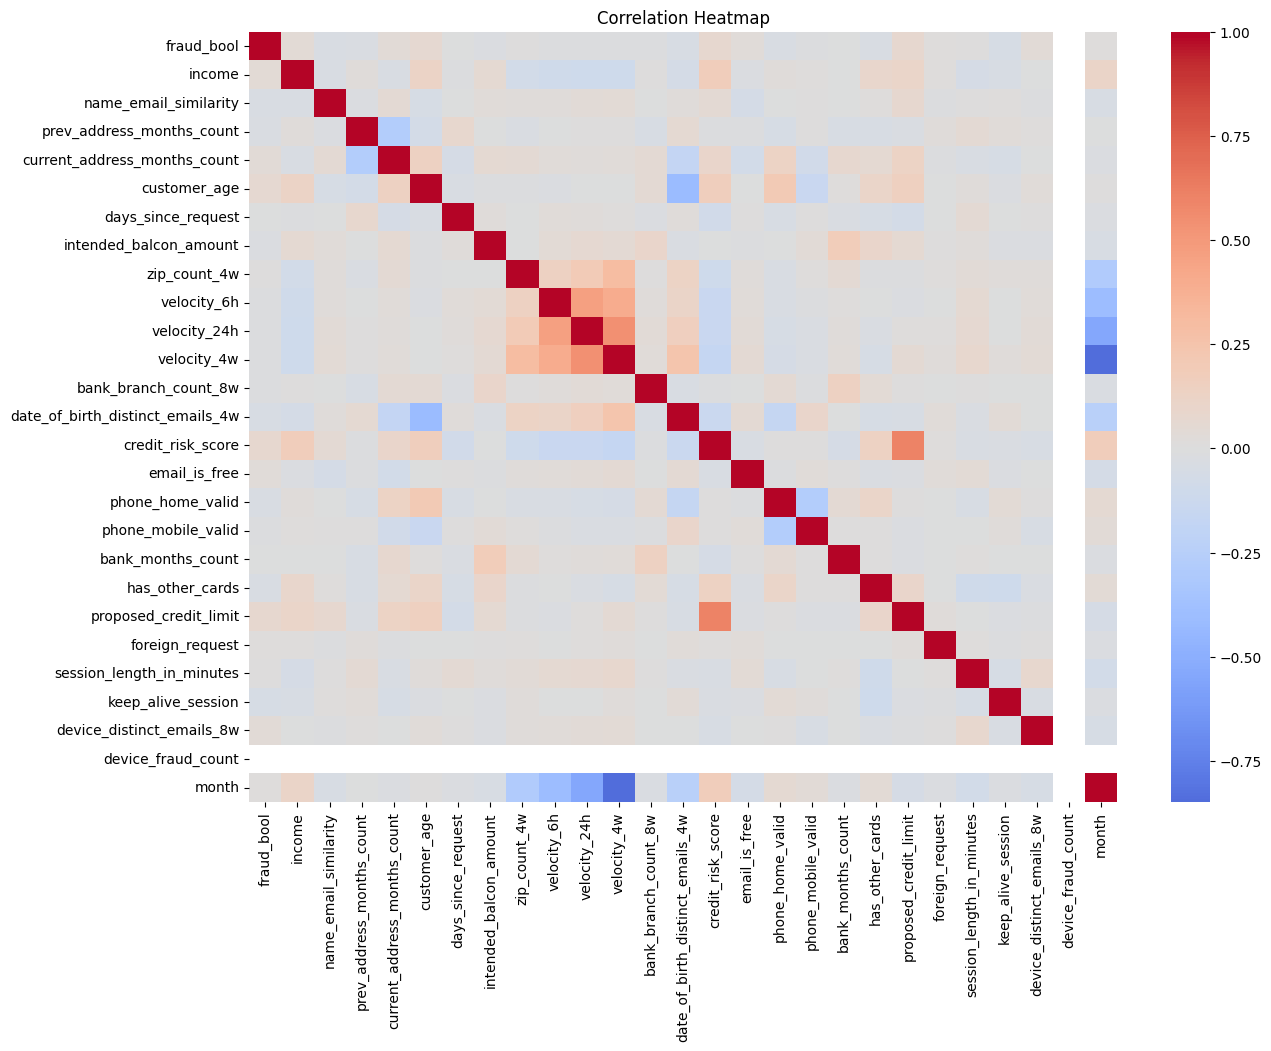

In [6]:
numeric_cols = base_df.select_dtypes(include='number')
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_cols.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


### Visualise Numeric Features

The idea behind this is to observe the general distribution across different features. If we use the `cleaned_base.csv` (where all features are numerical by floating point or category), we can observe the distribution.

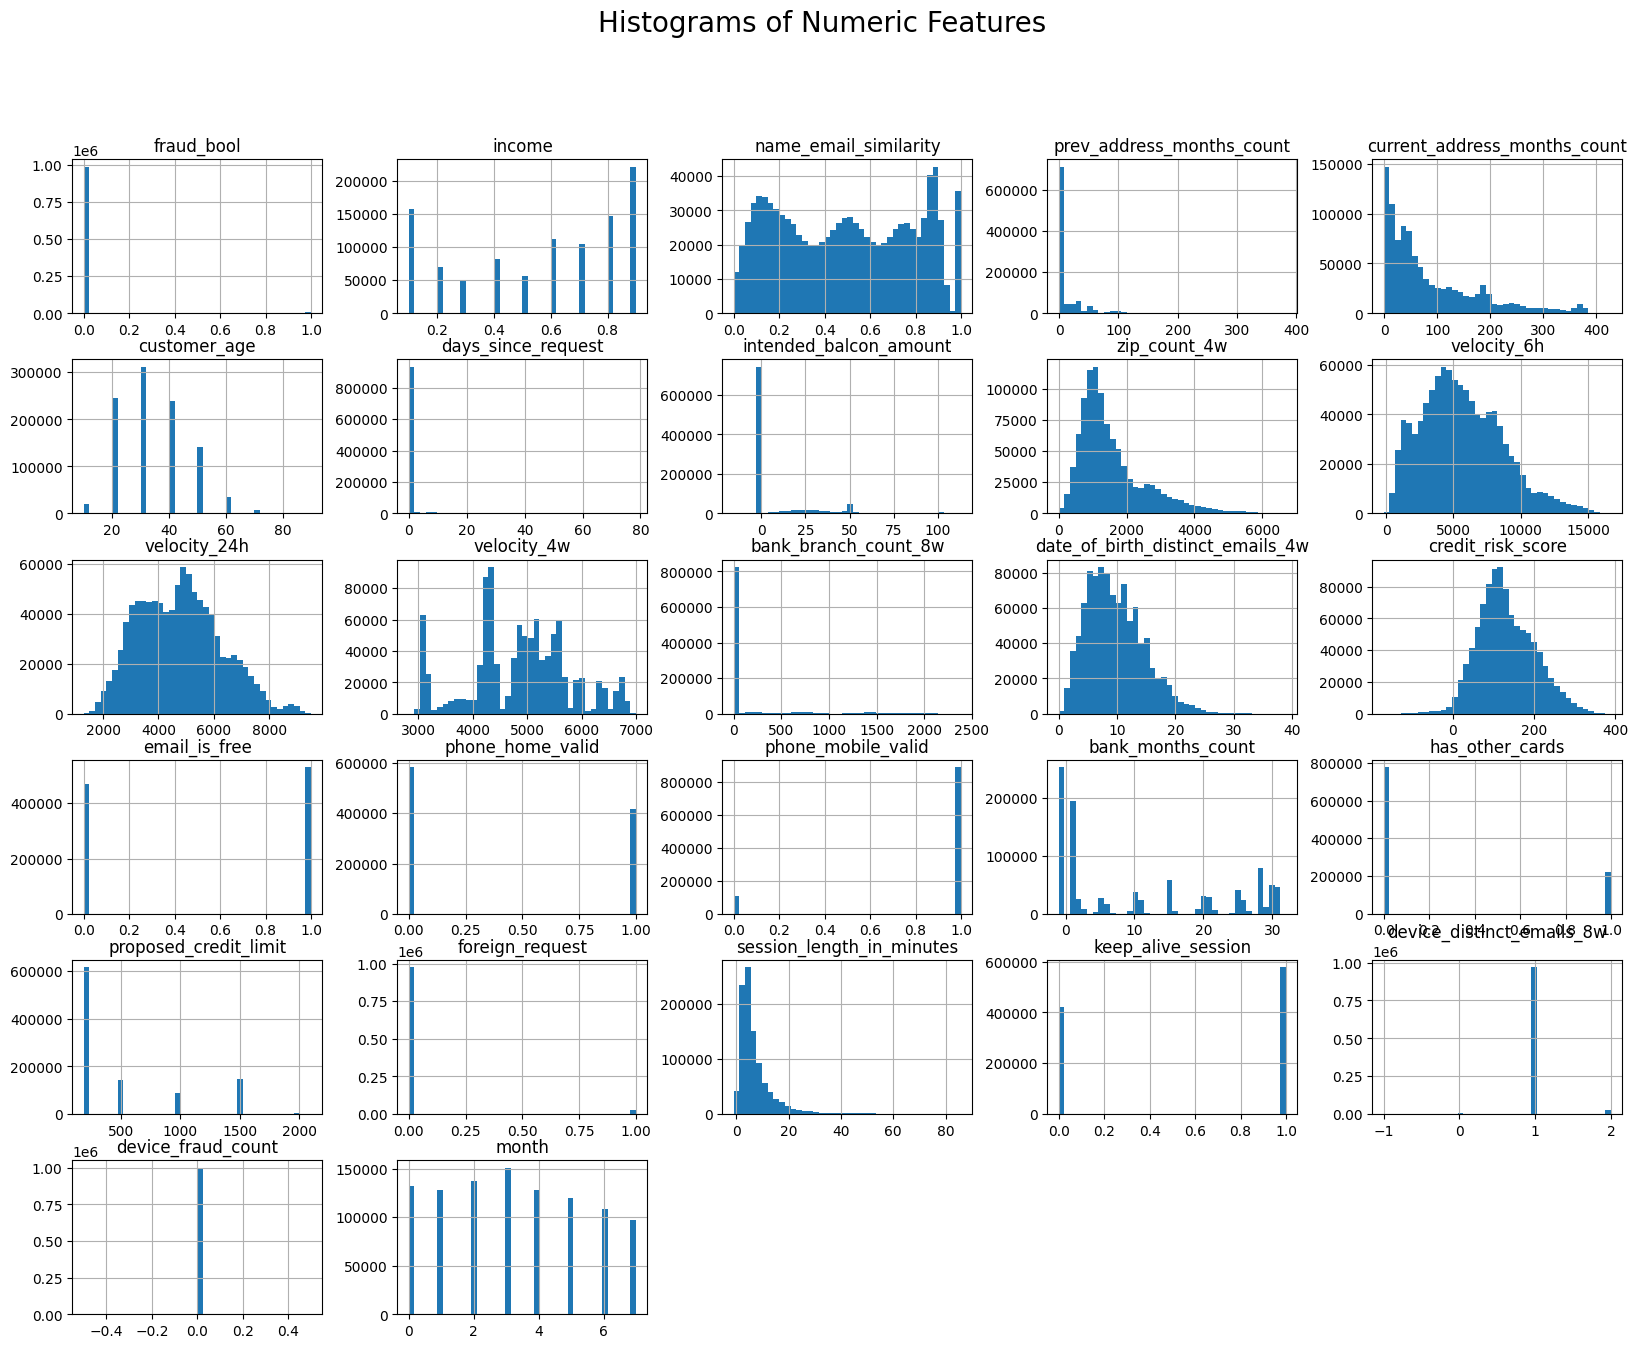

In [7]:
numeric_cols.hist(figsize=(20, 15), bins=40)
plt.suptitle("Histograms of Numeric Features", fontsize=20)
plt.show()


## Cleaned `Base.csv`

The following section contains visualisation results after `Base.csv` was cleaned. We draw our attention to `cleaned_base.csv` now.

In [8]:
# - load the `cleaned_base.csv`
cleaned_base_df = pd.read_csv("./data/processed/cleaned_base.csv")

# - data frames
display(cleaned_base_df.head())
print("Fraud shape:", cleaned_base_df.shape)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


Fraud shape: (1000000, 32)


### Pre-processing Summary

There are 5 features in the data that are not numerical in the `Base.csv`, namely:
- `payment_type` (categories: `AA`, `AB`, `AC`, `AD`, `AE`), 
- `employment_status` (categories: `CA`, `CB`, `CC`, `CD`, `CF`), 
- `housing_status` (categories: `BA`, `BB`, `BC`, `BD`, `BE`), 
- `source` (categories: `INTERNET`, `TELEAPP`), 
- `device_os` (categories: `linux`, `windows`, `macintosh`, `x11`, `other`).

These have been replaced with numerical categories from 1 in their presented order.

### Pairwise Correlation Matrix

It would be more beneficial to generate correlation matrices.

In [9]:
if "fraud_bool" in cleaned_base_df.columns:
  correlations = cleaned_base_df.corr(numeric_only=True)["fraud_bool"].sort_values(key=abs, ascending=False)
  print(correlations)



fraud_bool                          1.000000
credit_risk_score                   0.070624
proposed_credit_limit               0.068907
customer_age                        0.062959
keep_alive_session                 -0.050296
income                              0.045079
date_of_birth_distinct_emails_4w   -0.043224
name_email_similarity              -0.036720
device_distinct_emails_8w           0.035704
has_other_cards                    -0.035156
phone_home_valid                   -0.035128
current_address_months_count        0.033701
email_is_free                       0.027758
prev_address_months_count          -0.026031
intended_balcon_amount             -0.024524
velocity_6h                        -0.016892
foreign_request                     0.016885
month                               0.013250
phone_mobile_valid                 -0.013180
bank_branch_count_8w               -0.011577
velocity_4w                        -0.011536
velocity_24h                       -0.011183
session_le